In [1]:
import psycopg2
import psycopg2.extras
import pandas as pd

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                          user = "postgres",
                                          password = "Fahim1810",
                                          host = "localhost",
                                          port = "5432")
    def getConnection(self):
        print("Connection to DB established!")
        return self.connection
con = PostgresConnection().getConnection()

Connection to DB established!


# Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table 

In [3]:
cur = con.cursor()
s_statement = "SELECT s.division, SUM(t.total_price) " \
              "FROM stars.fact_table t " \
              "JOIN stars.store_dim s on s.store_key=t.store_key " \
                "JOIN stars.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY CUBE (s.division) "\
                "ORDER BY s.division "
cur.execute(s_statement)
q_div = cur.fetchall()
q_div

[('BARISAL                                           ', Decimal('638101.00')),
 ('CHITTAGONG                                        ', Decimal('1665138.00')),
 ('DHAKA                                             ', Decimal('3440676.25')),
 ('KHULNA                                            ', Decimal('952049.75')),
 ('RAJSHAHI                                          ', Decimal('1041201.25')),
 ('RANGPUR                                           ', Decimal('721057.50')),
 ('SYLHET                                            ', Decimal('465256.75')),
 (None, Decimal('8923480.50'))]

In [4]:
df = pd.DataFrame(list(q_div), columns=['division', 'sales'])

In [5]:
df['sales'] = df['sales'].astype('float64')

In [6]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt

In [8]:
df1=df.drop([7])

In [9]:
df1

,division,sales
0,BARISAL ...,638101.00
1,CHITTAGONG ...,1665138.00
2,DHAKA ...,3440676.25
3,KHULNA ...,952049.75
4,RAJSHAHI ...,1041201.25
5,RANGPUR ...,721057.50
6,SYLHET ...,465256.75


In [10]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np


In [12]:
df1

,division,sales
0,BARISAL ...,638101.00
1,CHITTAGONG ...,1665138.00
2,DHAKA ...,3440676.25
3,KHULNA ...,952049.75
4,RAJSHAHI ...,1041201.25
5,RANGPUR ...,721057.50
6,SYLHET ...,465256.75


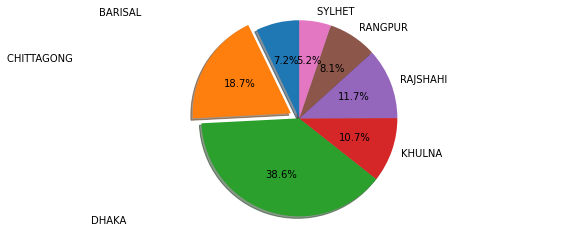

In [13]:
labels = df1['division']
sizes = df1['sales']
explode = (0,0.1, 0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [14]:
con = PostgresConnection().getConnection()
s_statement = """SELECT store_dim.district as "District", SUM(fact_table.total_price) "Sales" 
FROM stars.fact_table 
JOIN stars.store_dim ON
store_dim.store_key = fact_table.store_key 
GROUP BY CUBE(store_dim.district) 
ORDER BY store_dim.district"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(s_statement)
q_dis = cur.fetchall()
q_dis

Connection to DB established!


[('BAGERHAT                                          ', Decimal('1307651.00')),
 ('BANDARBAN                                         ', Decimal('995360.75')),
 ('BARGUNA                                           ', Decimal('869041.00')),
 ('BARISAL                                           ', Decimal('2897237.75')),
 ('BHOLA                                             ', Decimal('1012205.75')),
 ('BOGRA                                             ', Decimal('1716452.75')),
 ('BRAHMANBARIA                                      ', Decimal('1328234.25')),
 ('CHANDPUR                                          ', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ                                  ', Decimal('739447.50')),
 ('CHITTAGONG                                        ', Decimal('7292985.50')),
 ('CHUADANGA                                         ', Decimal('563909.75')),
 ('COMILLA                                           ', Decimal('2286898.25')),
 ("COX'S BAZAR                              

In [15]:
df2 = pd.DataFrame(list(q_dis), columns=['district', 'Sales'])

In [16]:
df2['Sales'] = df2['Sales'].astype('float64')

In [17]:
df2

,district,Sales
0,BAGERHAT ...,1.307651e+06
1,BANDARBAN ...,9.953608e+05
2,BARGUNA ...,8.690410e+05
3,BARISAL ...,2.897238e+06
4,BHOLA ...,1.012206e+06
...,...,...
60,SUNAMGANJ ...,1.593774e+06
61,SYLHET ...,1.727717e+06
62,TANGAIL ...,1.774650e+06
63,THAKURGAON ...,7.299342e+05


In [18]:
df2=df2.drop([64])

In [19]:
df2

,district,Sales
0,BAGERHAT ...,1307651.00
1,BANDARBAN ...,995360.75
2,BARGUNA ...,869041.00
3,BARISAL ...,2897237.75
4,BHOLA ...,1012205.75
...,...,...
59,SIRAJGANJ ...,1295100.75
60,SUNAMGANJ ...,1593774.00
61,SYLHET ...,1727717.25
62,TANGAIL ...,1774650.25


In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [23]:
import seaborn as sns

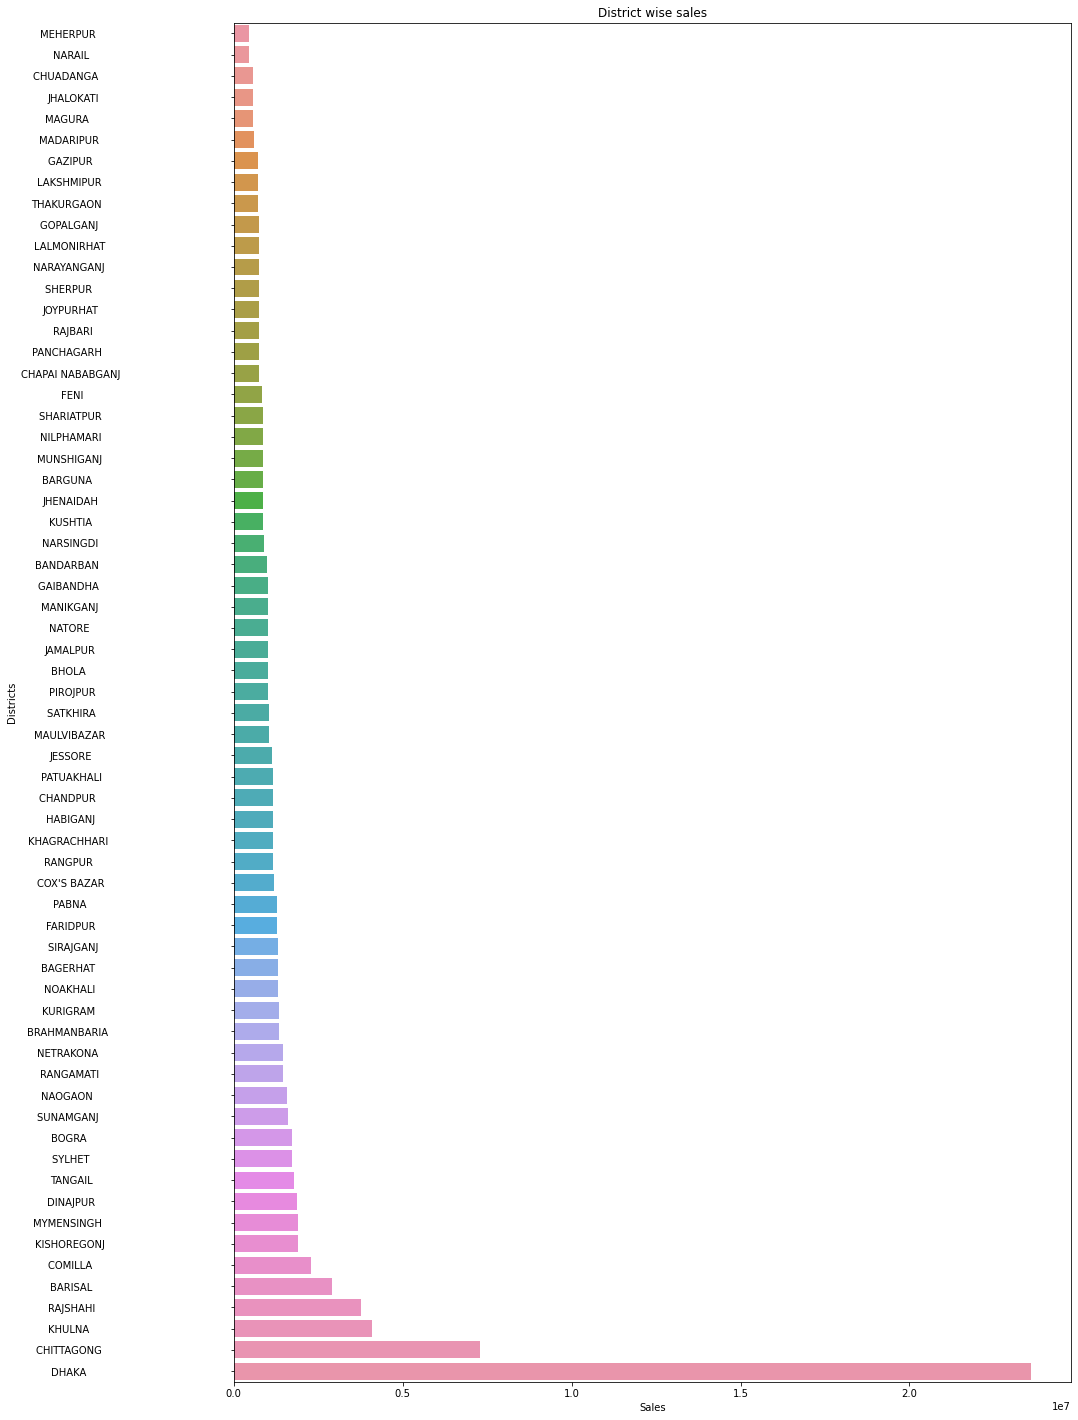

In [24]:
district_order = df2['district']
plt.figure(figsize=(15, 25))
sns.barplot(data=df2,x='Sales',y='district',order=df2.sort_values('Sales',ascending = True).district)
sns.color_palette("rocket", as_cmap=True)
plt.title('District wise sales')
plt.xlabel('Sales')
plt.ylabel('Districts');

In [25]:
con = PostgresConnection().getConnection()
s_statement = """SELECT time_dim.year as "Year", SUM(fact_table.total_price) "Sales" 
FROM stars.fact_table 
JOIN stars.time_dim ON
time_dim.time_key = fact_table.time_key 
GROUP BY CUBE(time_dim.year)
ORDER BY time_dim.year"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(s_statement)
q3 = cur.fetchall()
q3

Connection to DB established!


[(Decimal('2014'), Decimal('14334731.25')),
 (Decimal('2015'), Decimal('15095720.25')),
 (Decimal('2016'), Decimal('14976508.25')),
 (Decimal('2017'), Decimal('15015806.00')),
 (Decimal('2018'), Decimal('15108197.25')),
 (Decimal('2019'), Decimal('14949510.25')),
 (Decimal('2020'), Decimal('15037190.25')),
 (Decimal('2021'), Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [26]:
df4=pd.DataFrame(list(q3),columns=(['year','sales']))

In [27]:
df4

,year,sales
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25
8,None,105401435.75


In [28]:
df5=df4.drop([8])

In [29]:
df5['sales'] = df5['sales'].astype('float64')

In [30]:
df5

,year,sales
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25


In [31]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [91]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=df5['sales'],
            y=df5['year'],
            orientation='h'))

fig.show()

In [33]:
con = PostgresConnection().getConnection()
inserted_stmt = """SELECT time_dim.month as "month", SUM(fact_table.total_price) "sales" 
FROM stars.fact_table 
JOIN stars.time_dim ON
time_dim.time_key = fact_table.time_key 
GROUP BY CUBE(time_dim.month)
ORDER BY time_dim.month"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(inserted_stmt)
q_mon = cur.fetchall()
q_mon


Connection to DB established!


[(Decimal('1'), Decimal('9042244.00')),
 (Decimal('2'), Decimal('8073877.50')),
 (Decimal('3'), Decimal('8939152.00')),
 (Decimal('4'), Decimal('8504634.75')),
 (Decimal('5'), Decimal('9078002.50')),
 (Decimal('6'), Decimal('8556853.00')),
 (Decimal('7'), Decimal('9046580.00')),
 (Decimal('8'), Decimal('8929475.25')),
 (Decimal('9'), Decimal('8724326.50')),
 (Decimal('10'), Decimal('8902783.75')),
 (Decimal('11'), Decimal('8680026.00')),
 (Decimal('12'), Decimal('8923480.50')),
 (None, Decimal('105401435.75'))]

In [34]:
df6=pd.DataFrame(list(q_mon), columns=['month','sales'])

In [35]:
df6

,month,sales
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


In [36]:
df6=df6.drop([12])

In [37]:
df6

,month,sales
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


In [38]:
df6['sales'] = df6['sales'].astype('float64')

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])#secondary_y=True associates the right side yaxis
fig.add_trace(go.Bar(x=df6['sales'], y= df6['month'], orientation='h',
                     marker_color=[3,2,1,5,4,6], marker_colorscale='matter', 
                     marker_colorbar_x=-0.15), secondary_y=True)
fig.update_xaxes(autorange='reversed')
fig.update_layout(width=600, height=500)

# Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [41]:
con=PostgresConnection().getConnection()

Connection to DB established!


In [42]:
statement="""SELECT customer_dim.name as "name", SUM(fact_table.total_price) "sales"
FROM stars.fact_table
JOIN stars.customer_dim ON
customer_dim.customer_key = fact_table.customer_key
GROUP BY CUBE(customer_dim.name)
ORDER BY customer_dim.name"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statement)
q_name = cur.fetchall()
q_name

[('-                                                 ', Decimal('20643.50')),
 ('aafreen fatima                                    ', Decimal('11174.75')),
 ('aafrin                                            ', Decimal('22136.75')),
 ('aafrin @ dolly                                    ', Decimal('23529.75')),
 ('aaftaab husan                                     ', Decimal('9682.00')),
 ('aakanksha                                         ', Decimal('11469.00')),
 ('aaliya                                            ', Decimal('21663.25')),
 ('aamina                                            ', Decimal('12649.25')),
 ('aamir                                             ', Decimal('10134.00')),
 ('aamir hussain                                     ', Decimal('10892.50')),
 ('aamod & pramod                                    ', Decimal('12280.25')),
 ('aamrin jahan                                      ', Decimal('11622.00')),
 ('aanamika misra                                    ', Decimal('

In [43]:
statement="""SELECT Trans_dim.bank_name as "bank", SUM(fact_table.total_price) "sales"
FROM stars.fact_table
JOIN stars.Trans_dim ON
Trans_dim.payment_key = fact_table.payment_key
GROUP BY CUBE(Trans_dim.bank_name)
ORDER BY Trans_dim.bank_name"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statement)
q_bank = cur.fetchall()
q_bank

[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [44]:
df8=pd.DataFrame(list(q_bank), columns=(['bank','sales']))

In [45]:
df8

,bank,sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


In [46]:
df8=df8.drop([39])

In [47]:
df8['sales']=df8['sales'].astype('float64')

In [48]:
import plotly.express as px

grafico_dose1 = px.bar(df8, x=df8['sales'], y=df8['bank'], color=df8.index)
grafico_dose1.show()

In [49]:
statement="""SELECT Trans_dim.trans_type as "transaction_type", SUM(fact_table.total_price) "sales"
FROM stars.fact_table
JOIN stars.Trans_dim ON
Trans_dim.payment_key = fact_table.payment_key
GROUP BY Trans_dim.trans_type
ORDER BY Trans_dim.trans_type"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statement)
q_trans = cur.fetchall()
q_trans

[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50'))]

In [50]:
df9=pd.DataFrame(list(q_trans), columns=['transaction_type','sales'])

In [51]:
df9

,transaction_type,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


In [52]:
df9['sales']=df9['sales'].astype('float64')

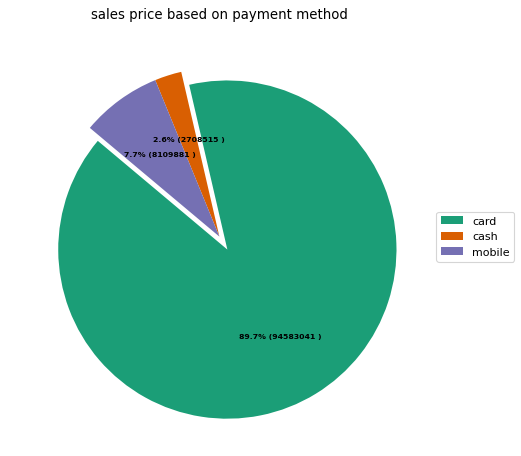

In [54]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df9['sales']
categories = df9['transaction_type']
explode = [0.09,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="black"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=7, weight=700)
ax.set_title("sales price based on payment method")
plt.show()

# Q3: Total sales in Barisal

In [55]:
statements="""SELECT store_dim.district as "district", SUM(fact_table.total_price) "sales"
FROM stars.fact_table
JOIN stars.store_dim ON
store_dim.store_key = fact_table.store_key
WHERE store_dim.district='BARISAL'
GROUP BY store_dim.district
"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statements)
q9 = cur.fetchall()
q9

[('BARISAL                                           ', Decimal('2897237.75'))]

# Q4: Total sales in 2015

In [56]:
statements="""SELECT time_dim.year as "year", SUM(fact_table.total_price) "sales"
FROM stars.fact_table
JOIN stars.time_dim ON
time_dim.time_key = fact_table.time_key
WHERE time_dim.year='2015'
GROUP BY time_dim.year
"""

cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(statements)
q9 = cur.fetchall()
q9

[(Decimal('2015'), Decimal('15095720.25'))]

# Q5: Total sales of Barisal in 2015

In [57]:
statements="""SELECT store_dim.district as "district",time_dim.year,SUM(fact_table.total_price) "sales"
FROM stars.fact_table
JOIN stars.store_dim ON
store_dim.store_key=fact_table.store_key
JOIN stars.time_dim ON
time_dim.time_key=fact_table.time_key
WHERE store_dim.district='BARISAL'AND
time_dim.year='2015'
GROUP BY time_dim.year,store_dim.district
"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
total_sales_in_2015_and_barisal = pd.read_sql_query(statements, con)
con.commit()
cur.close()

In [58]:
total_sales_in_2015_and_barisal

,district,year,sales
0,BARISAL ...,2015.0,415748.75


# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [59]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = """SELECT store_dim.store_key as store_key, item_dim.item_name as item_name, sum(fact_table.quantity) as quantity_of_sales 
FROM stars.fact_table  
JOIN stars.store_dim ON
store_dim.store_key = fact_table.store_key 
JOIN stars.item_dim ON 
item_dim.item_key = fact_table.item_key 
GROUP BY CUBE(store_dim.store_key, item_dim.item_name)
ORDER BY store_dim.store_key, sum(fact_table.quantity) desc"""
                
curr.execute(select_stmts)
most_purchased_product = curr.fetchall()
most_purchased_product

Connection to DB established!


[('S0001', None, Decimal('8169')),
 ('S0001', 'Pepsi - 12 oz cans', Decimal('92')),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', Decimal('90')),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', Decimal('78')),
 ('S0001', 'Waterloo Sparkling Lime 12oz', Decimal('70')),
 ('S0001', 'Njoy Sugar Canister 22 oz', Decimal('69')),
 ('S0001', 'Vita Coconut Water 10oz ', Decimal('68')),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', Decimal('67')),
 ('S0001', 'Sprite - 12 oz cans', Decimal('64')),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', Decimal('63')),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', Decimal('62')),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', Decimal('61')),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', Decimal('60')),
 ('S0001', 'A&W Root Beer - 12 oz cans', Decimal('60')),
 ('S0001', 'Dark Chocolate Mint Patties', Decimal('60')),
 ('S0001', 'Large Trash Bags Black 33 gal', Decimal('59')),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', De

In [60]:
topmost_purchased_product = pd.DataFrame(list(most_purchased_product), columns=['store_id', 'item', 'quantity'])
topmost_purchased_product=topmost_purchased_product.dropna()
topmost_purchased_product = topmost_purchased_product.groupby('store_id').head(3)
topmost_purchased_product.head(100)

,store_id,item,quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
...,...,...,...
8013,S0012,Propel Zero Variety 20 oz,76
8270,S00120,Pepsi - 12 oz cans,85
8271,S00120,Sprite - 12 oz cans,73
8272,S00120,Mars Mini Mix,72


In [61]:
topmost_purchased_product.dtypes

store_id    object
item        object
quantity    object
dtype: object

# Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [63]:
x=input('Enter number of days: ')

Enter number of days: 300


In [64]:
con = PostgresConnection().getConnection()
cur = con.cursor()
statement1='''SELECT i.item_name,tim.date,tt.trans_type 
                    FROM stars.fact_table ft 
                    JOIN stars.item_dim i ON i.item_key=ft.item_key 
                    JOIN stars.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN stars.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.date>(CURRENT_DATE::date - '
                    '''
statement2=str(x)+" days'::interval) AND tt.trans_type='card'"

stmt_card = statement1+statement2
cur.execute(stmt_card)
records_card = cur.fetchall()
card = pd.DataFrame(list(records_card), columns=['item_name','date', 'trans_type'])
card

Connection to DB established!


,item_name,date,trans_type
0,A&W Root Beer Diet - 12 oz cans,2021-11-01,card
1,A&W Root Beer Diet - 12 oz cans,2021-12-01,card
2,A&W Root Beer Diet - 12 oz cans,2021-11-01,card
3,Barq's Root Beer - 12 oz cans,2021-11-01,card
4,Cherry Coke 12oz,2021-12-01,card
...,...,...,...
500,Strong Everyday Napkins,2021-11-01,card
501,Advil 2 pill packets,2021-11-01,card
502,Tylenol Extra Strength 2 pill packets,2021-11-01,card
503,Tylenol Extra Strength 2 pill packets,2021-11-01,card


In [65]:
card.dtypes

item_name     object
date          object
trans_type    object
dtype: object

In [67]:
cur = con.cursor()
statement1='''SELECT i.item_name,tim.date,tt.trans_type 
                    FROM stars.fact_table ft 
                    JOIN stars.item_dim i ON i.item_key=ft.item_key 
                    JOIN stars.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN stars.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.date>(CURRENT_DATE::date - '
                    '''
statement2=str(x)+" days'::interval) AND tt.trans_type='mobile' "

stmt_m = statement1+statement2
cur.execute(stmt_m)
q_m = cur.fetchall()
m = pd.DataFrame(list(q_m), columns=['item_name','date', 'trans_type'])
m

,item_name,date,trans_type
0,Cherry Coke 12oz,2021-11-01,mobile
1,Cherry Coke Zero 12 pack,2021-12-01,mobile
2,Coke Classic 12 oz cans,2021-12-01,mobile
3,Diet Mountain Dew 12oz cans,2021-12-01,mobile
4,Sprite Zero - 12 pack,2021-12-01,mobile
5,La Croix Sparkling Grapefruit 12 oz,2021-11-01,mobile
6,La Croix Sparkling Grapefruit 12 oz,2021-12-01,mobile
7,La Croix Sparkling Grapefruit 12 oz,2021-12-01,mobile
8,La Croix Sparkling Lemon 12 oz,2021-11-01,mobile
9,Perrier Sparkling Water plastic 16.9oz,2021-12-01,mobile


In [69]:
cur = con.cursor()
statement1='''SELECT tt.trans_type,COUNT(*)
                    FROM stars.fact_table ft 
                    JOIN stars.item_dim i ON i.item_key=ft.item_key 
                    JOIN stars.trans_dim tt ON tt.payment_key=ft.payment_key 
                    JOIN stars.time_dim tim ON tim.time_key=ft.time_key
                    WHERE tim.date>(CURRENT_DATE::date - '
                    '''
statement2=str(x)+" days'::interval) AND (tt.trans_type='card' OR tt.trans_type='mobile') GROUP BY ROLLUP(trans_type) "

select_stmt_mobcard = statement1+statement2
cur.execute(select_stmt_mobcard)
records_mobcard = cur.fetchall()
mobilecard = pd.DataFrame(list(records_mobcard), columns=['trans_type','count'])
mobilecard

,trans_type,count
0,None,558
1,mobile,53
2,card,505


In [70]:
mobilecard.dtypes

trans_type    object
count          int64
dtype: object

<AxesSubplot:ylabel='count'>

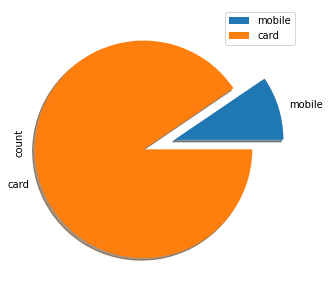

In [71]:
myexplode = [0.1, 0.2]
mobilecard = mobilecard.set_index(['trans_type'])
l=mobilecard[1:3]
l.plot.pie(y='count',figsize=(5,5),shadow='True',explode=myexplode)


# Q8: What season(quarter) is the worst for each product item? 

In [72]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT item_dim.item_name, quarter, SUM(quantity)
FROM stars.fact_table
JOIN stars.item_dim ON item_dim.item_key = fact_table.item_key
JOIN stars.time_dim ON time_dim.time_key = fact_table.time_key
GROUP BY CUBE(item_name, time_dim.quarter)
ORDER BY item_name, SUM(quantity)"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
worst_season = pd.read_sql_query(insert_stmt, con)
con.commit()
cur.close()
worst_season.groupby('item_name').head(1)

Connection to DB established!


,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
5,A&W Root Beer - 12 oz cans,Q2,5735.0
10,A&W Root Beer Diet - 12 oz cans,Q4,5589.0
15,Advil 2 pill packets,Q1,5453.0
20,All Purpose Cleaner 409 Spray,Q1,5325.0
...,...,...,...
1275,Wint O Green LifeSavers Sugar Free,Q1,5323.0
1280,Wonderful Pistachios (in shell),Q1,5578.0
1285,Yoplait Original Yogurt Variety Pack,Q1,5426.0
1290,Zoo Animal Cookies/Crackers,Q1,5462.0


In [73]:
worst_season.dropna()

,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
1,100% Juice Box Variety 6.75 oz,Q4,5806.0
2,100% Juice Box Variety 6.75 oz,Q2,5876.0
3,100% Juice Box Variety 6.75 oz,Q3,6045.0
5,A&W Root Beer - 12 oz cans,Q2,5735.0
...,...,...,...
1288,Yoplait Original Yogurt Variety Pack,Q3,5761.0
1290,Zoo Animal Cookies/Crackers,Q1,5462.0
1291,Zoo Animal Cookies/Crackers,Q2,5508.0
1292,Zoo Animal Cookies/Crackers,Q4,5520.0


In [74]:
worst_season.groupby('item_name').head(1)

,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
5,A&W Root Beer - 12 oz cans,Q2,5735.0
10,A&W Root Beer Diet - 12 oz cans,Q4,5589.0
15,Advil 2 pill packets,Q1,5453.0
20,All Purpose Cleaner 409 Spray,Q1,5325.0
...,...,...,...
1275,Wint O Green LifeSavers Sugar Free,Q1,5323.0
1280,Wonderful Pistachios (in shell),Q1,5578.0
1285,Yoplait Original Yogurt Variety Pack,Q1,5426.0
1290,Zoo Animal Cookies/Crackers,Q1,5462.0


In [75]:
worst_season.groupby('item_name').head(3)

,item_name,quarter,sum
0,100% Juice Box Variety 6.75 oz,Q1,5698.0
1,100% Juice Box Variety 6.75 oz,Q4,5806.0
2,100% Juice Box Variety 6.75 oz,Q2,5876.0
5,A&W Root Beer - 12 oz cans,Q2,5735.0
6,A&W Root Beer - 12 oz cans,Q4,5820.0
...,...,...,...
1291,Zoo Animal Cookies/Crackers,Q2,5508.0
1292,Zoo Animal Cookies/Crackers,Q4,5520.0
1295,None,Q1,1483656.0
1296,None,Q2,1489068.0


# Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [90]:
select_items = "SELECT i.item_name, s.division, sum(ft.total_price) "\
            "FROM stars.fact_table ft "\
            "JOIN stars.item_dim i on i.item_key=ft.item_key "\
            "JOIN stars.store_dim s on s.store_key = ft.store_key "\
            "GROUP BY CUBE(i.item_name, s.division) "\
            "ORDER BY i.item_name,s.division "
cur.execute(select_items)
itemsdiv = cur.fetchall()
idiv = pd.DataFrame(list(itemsdiv), columns=['Item', 'Division', 'Sales'])
idiv = idiv.dropna()
idiv.head(30)

,Item,Division,Sales
0,100% Juice Box Variety 6.75 oz,BARISAL ...,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG ...,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA ...,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA ...,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI ...,38730.0
5,100% Juice Box Variety 6.75 oz,RANGPUR ...,26685.0
6,100% Juice Box Variety 6.75 oz,SYLHET ...,18270.0
8,A&W Root Beer - 12 oz cans,BARISAL ...,19101.5
9,A&W Root Beer - 12 oz cans,CHITTAGONG ...,52060.5
10,A&W Root Beer - 12 oz cans,DHAKA ...,107479.0


In [80]:
idi=idiv
idi.sort_values(by=["Sales"],ascending=False,inplace=True)

In [81]:
idi=idi.groupby('Division').head(1)
idi

,Item,Division,Sales
1650,Red Bull 12oz,DHAKA ...,510895.0
1649,Red Bull 12oz,CHITTAGONG ...,246510.0
1652,Red Bull 12oz,RAJSHAHI ...,148885.0
1651,Red Bull 12oz,KHULNA ...,139645.0
973,K Cups Daily Chef Columbian Supremo,RANGPUR ...,101866.0
1648,Red Bull 12oz,BARISAL ...,95205.0
974,K Cups Daily Chef Columbian Supremo,SYLHET ...,69165.0


# Q10: What are the average sales of products sales per store monthly?

In [85]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_average = "SELECT s.store_key, tim.month, avg(ft.total_price) "\
                "FROM stars.fact_table ft "\
                "JOIN stars.store_dim s on s.store_key = ft.store_key "\
                "JOIN stars.time_dim tim on tim.time_key = ft.time_key "\
                "GROUP BY CUBE(s.store_key, tim.month) "\
                "ORDER BY s.store_key, tim.month "
cur.execute(select_average)
average = cur.fetchall()
averagemonth = pd.DataFrame(list(average), columns=['store_id', 'month', 'average sales'])
print(averagemonth)
#pd_data.plot.bar(x='Month', y='Avg. Sales', rot=0, figsize=(15,10))

Connection to DB established!
     store_id month         average sales
0       S0001     1   97.7543103448275862
1       S0001     2  100.5776699029126214
2       S0001     3  109.4158878504672897
3       S0001     4   98.8805309734513274
4       S0001     5   99.5245535714285714
...       ...   ...                   ...
9446     None     9  105.4656137424143517
9447     None    10  105.5257301519569495
9448     None    11  105.9146828059985602
9449     None    12  105.6896222951285665
9450     None  None  105.4014357500000000

[9451 rows x 3 columns]
